In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("./kc_house_data.csv", encoding="latin-1")

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## квадратура жилая

In [8]:
df.sqft_living.value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64

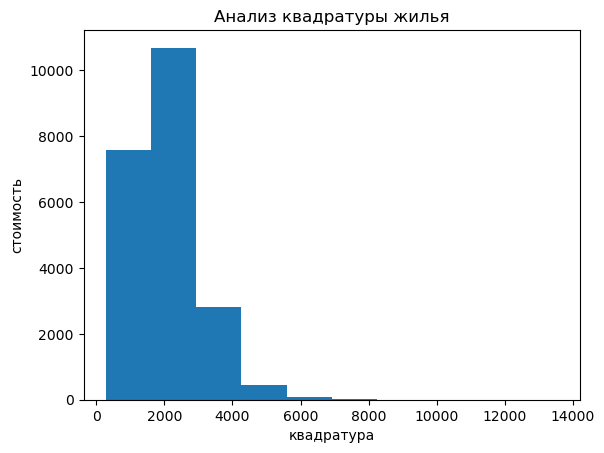

In [9]:
plt.figure.figsize=(6, 20)
plt.hist(df.sqft_living)
plt.title("Анализ квадратуры жилья")
plt.xlabel("квадратура")
plt.ylabel("стоимость");

## год постройки

In [10]:
df.yr_built.value_counts().sort_index()

1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Name: yr_built, Length: 116, dtype: int64

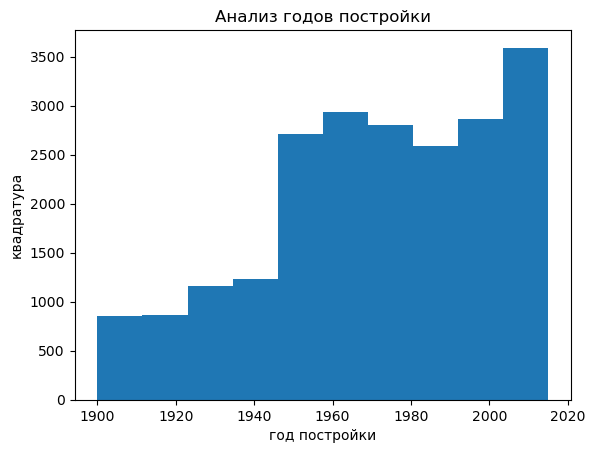

In [11]:
plt.figure.figsize=(6, 20)
plt.hist(df.yr_built)
plt.title("Анализ годов постройки")
plt.xlabel("год постройки")
plt.ylabel("квадратура");

## вид на набережную

In [12]:
df.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

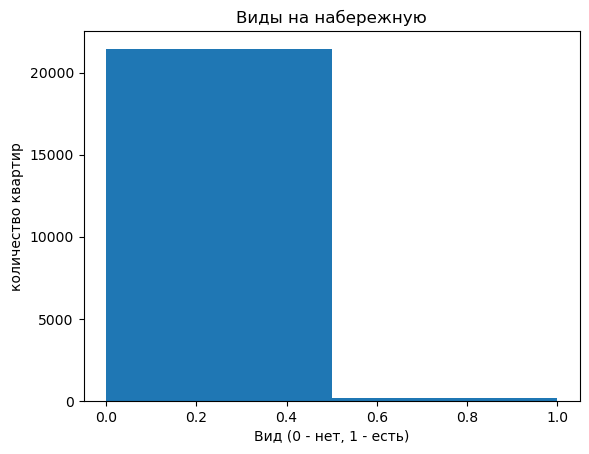

In [57]:
plt.figure.figsize=(6, 20)
plt.hist(df.waterfront, bins=2)
plt.title("Виды на набережную")
plt.xlabel("Вид (0 - нет, 1 - есть)")
plt.ylabel("количество квартир");

## распределение этажей

In [14]:
df.floors.value_counts().sort_index()

1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: floors, dtype: int64

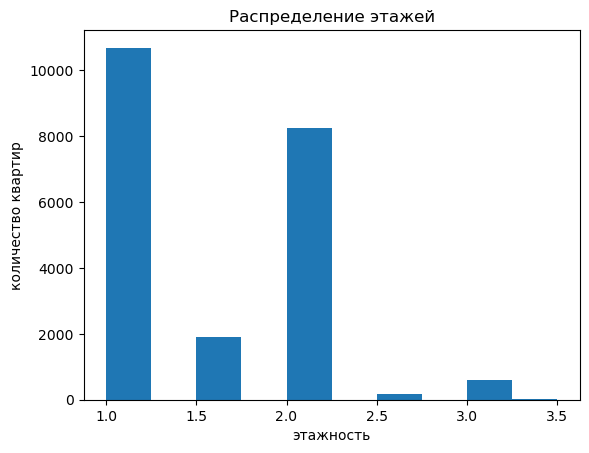

In [15]:
plt.figure.figsize=(6, 20)
plt.hist(df.floors)
plt.title("Распределение этажей")
plt.xlabel("этажность")
plt.ylabel("количество квартир");

## состояние жилья

In [16]:
df.condition.value_counts().sort_index()

1       30
2      172
3    14031
4     5679
5     1701
Name: condition, dtype: int64

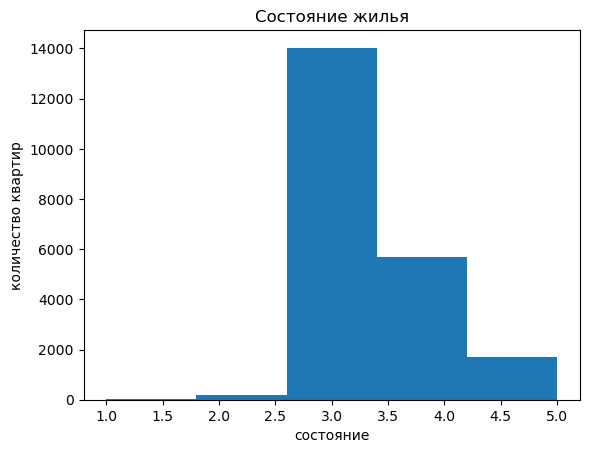

In [56]:
plt.figure.figsize=(6, 20)
plt.hist(df.condition, bins=5)
plt.title("Состояние жилья")
plt.xlabel("состояние")
plt.ylabel("количество квартир");

## Какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

### посмотрим зависимость стоимости жилья от его состояния

In [18]:
df.groupby('condition').agg({'price': ['min', 'max', 'mean']})

price                          
                min        max           mean
condition                                    
1           78000.0  1500000.0  334431.666667
2           80000.0  2555000.0  327287.145349
3           75000.0  7062500.0  542012.578148
4           89000.0  7700000.0  521200.390033
5          110000.0  3650000.0  612418.089359

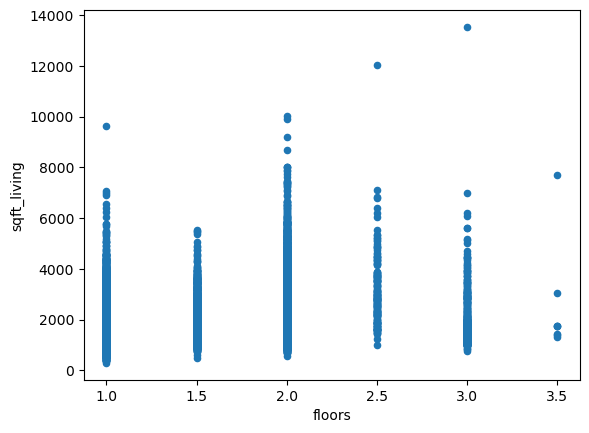

In [46]:
df.plot( y='sqft_living', x='floors', kind='scatter');

#### Выводы: самые большие дома - это 2-этажные

#### посмотрим зависимость стоимости от этажности

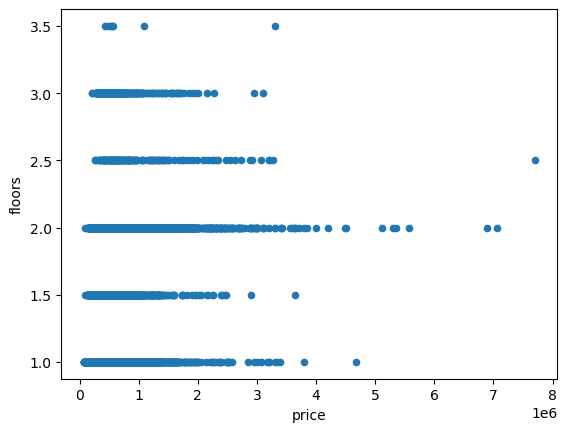

In [19]:
df.plot( x='price', y='floors', kind='scatter');

#### Выводы: видим, что самое дорогое жилье - это 2-этажные дома (2,5 принимаем за всплеск и не учитываем)

### проанализируем количество жилых комнат

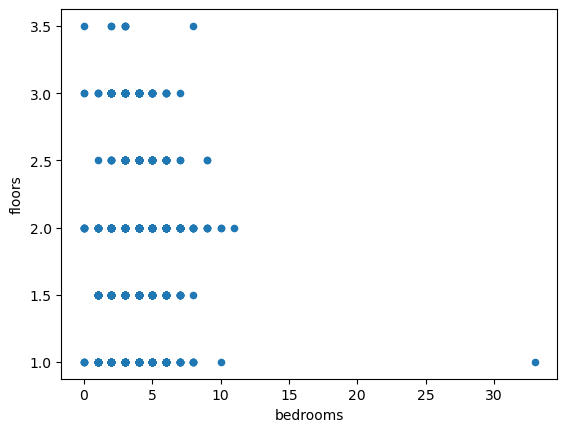

In [47]:
df.plot( x='bedrooms', y='floors', kind='scatter');

#### Вывод: и снова 2-этажные в лидерах по количеству комнат

## Посмотрим зависимость цены от количества спален

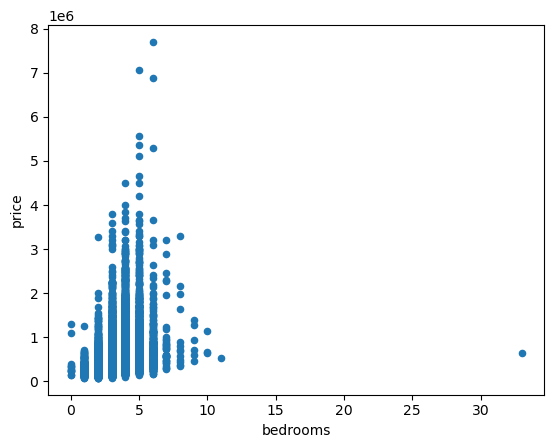

In [74]:
df.plot( x='bedrooms', y='price', kind='scatter');

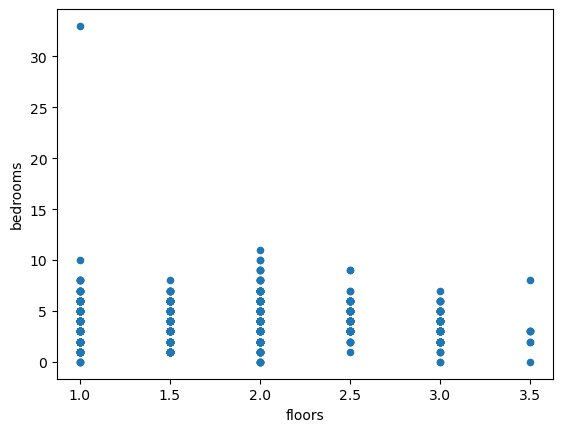

In [76]:
df.plot( x='floors', y='bedrooms', kind='scatter');

#### Вывод: я бы купил дом полуторку (1,5 этажа) с 4 комнатами. Это оптимальный вариант по цене, количеству комнат и состоянию дома :)